## Zadanie 1
Wykorzystując podany zbiór danych zbuduj model regresji liniowej, w którym na podstawie danych będziesz prognmzował zmienną OSAT (ogólną ocene klienta). Oceń wpływ zmiennych objaśniających na zmienną objaśnianą.

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("Sub_Sandwiches_OSAT.csv")
df.head()

,Respondent_Serial,brand,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,2,Subway,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
1,2,McDonalds,2,5.0,1.0,4.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
2,4,Subway,5,4.0,4.0,4.0,5.0,6.0,6.0,NaN,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
3,4,McDonalds,6,3.0,5.0,5.0,4.0,2.0,1.0,NaN,...,4.0,5.0,4.0,1.0,1.0,1.0,1.0,NaN,4.0,3.0
4,5,Firehouse Subs,5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0


In [26]:
df.iloc[:,3:]= df.iloc[:,3:].fillna(df.iloc[:,3:].mean())
df.isna().sum()

Respondent_Serial                                                 0
brand                                                             0
OSAT                                                              0
Food looks appetizing                                             0
Has food that tastes good                                         0
Has food I crave                                                  0
Provides the right proportions of ingredients                     0
Has a wide variety of menu options                                0
Offers healthy/better-for-you menu options                        0
Is making changes to improve their food                           0
Has a unique, distinctive approach that makes food better         0
Has a wide range of ingredients                                   0
Portions are the right size for my appetite                       0
Has good environmental/sustainability practices                   0
Is worth the price                              

In [27]:
features = df.loc[:, df.columns.drop(['OSAT', 'brand', 'Respondent_Serial'])]
target = df["OSAT"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [30]:
model = LinearRegression().fit(X_train, y_train)

In [8]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [31]:
print(f"Determination coefficient is:{r2}, which means the variance of the target is explained in {r2*100:.2f}% by the model.")
print(f"Mean squared error is: {mse}.")

Determination coefficient is:0.5669969798420229, which means the variance of the target is explained in 56.70% by the model.
Mean squared error is: 0.8826451618316961.


## Zadanie 2
Wykorzystując podany zbiór danych zbuduj model regresji logistycznej, w którym na podstawie danych będziesz prognozował zmienną OSAT (ogólną ocene klienta). Zmienną OSAT zmień na zmienną binarną:
- oceny od 1 do 3 włącznie -> ocena negatywna
- oceny od 4 do 6 włącznie -> ocena pozytywna

Oceń wpływ zmiennych objaśniających na zmienną objaśnianą.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [33]:
binary_OSAT = [0 if x in [1,2,3] else 1 for x in df["OSAT"]]
df["binary_OSAT"] = binary_OSAT


In [34]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, binary_OSAT, test_size = 0.3)

In [13]:
reg = LogisticRegression().fit(X_train_log, y_train_log)
y_pred_log = reg.predict(X_test_log)


# The warning may be caused by high multicollinearity of features. Using standarization or normalization may improve results of modelling.

/home/kata/apps/anaconda3/envs/python_intro/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
r2_score(y_test_log, y_pred_log), accuracy_score(y_test_log, y_pred_log), mean_squared_error(y_test_log, y_pred_log)

(0.1920886526505623, 0.9143536875495638, 0.08564631245043616)

In [35]:
reg.coef_[0]

array([ 1.23097453e-01,  5.12564057e-01,  2.70420847e-01,  1.51569460e-01,
       -2.55498729e-01, -6.47225782e-02,  3.73230818e-02,  1.03974162e-01,
       -1.96787609e-02,  3.66721427e-02, -3.01890463e-02,  1.09453514e-01,
       -9.88311173e-02,  2.19763598e-01,  1.69533411e-01, -4.29727502e-04,
       -2.61095295e-02,  7.13976894e-02, -2.47843914e-02,  6.39557156e-02,
        3.08674669e-02, -8.72086709e-02, -3.55701984e-02,  4.54941350e-02,
        9.82725127e-02,  9.71203861e-02, -1.72694050e-01, -1.85655597e-03,
       -1.50990366e-01, -1.36871659e-01,  1.61236613e-01, -5.06557017e-03,
        1.13364281e-01,  2.66280563e-02,  1.15275832e-02, -5.41347956e-03,
       -1.60540263e-02, -1.25067142e-01,  5.31154540e-02,  3.24285451e-01])

In [16]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient':model.coef_})
coefficients

,Feature,Coefficient
0,Food looks appetizing,0.141667
1,Has food that tastes good,0.180892
2,Has food I crave,0.176008
3,Provides the right proportions of ingredients,0.047883
4,Has a wide variety of menu options,0.002033
5,Offers healthy/better-for-you menu options,-0.000317
6,Is making changes to improve their food,-0.031072
7,"Has a unique, distinctive approach that makes ...",0.038122
8,Has a wide range of ingredients,-0.046913
9,Portions are the right size for my appetite,-0.003911


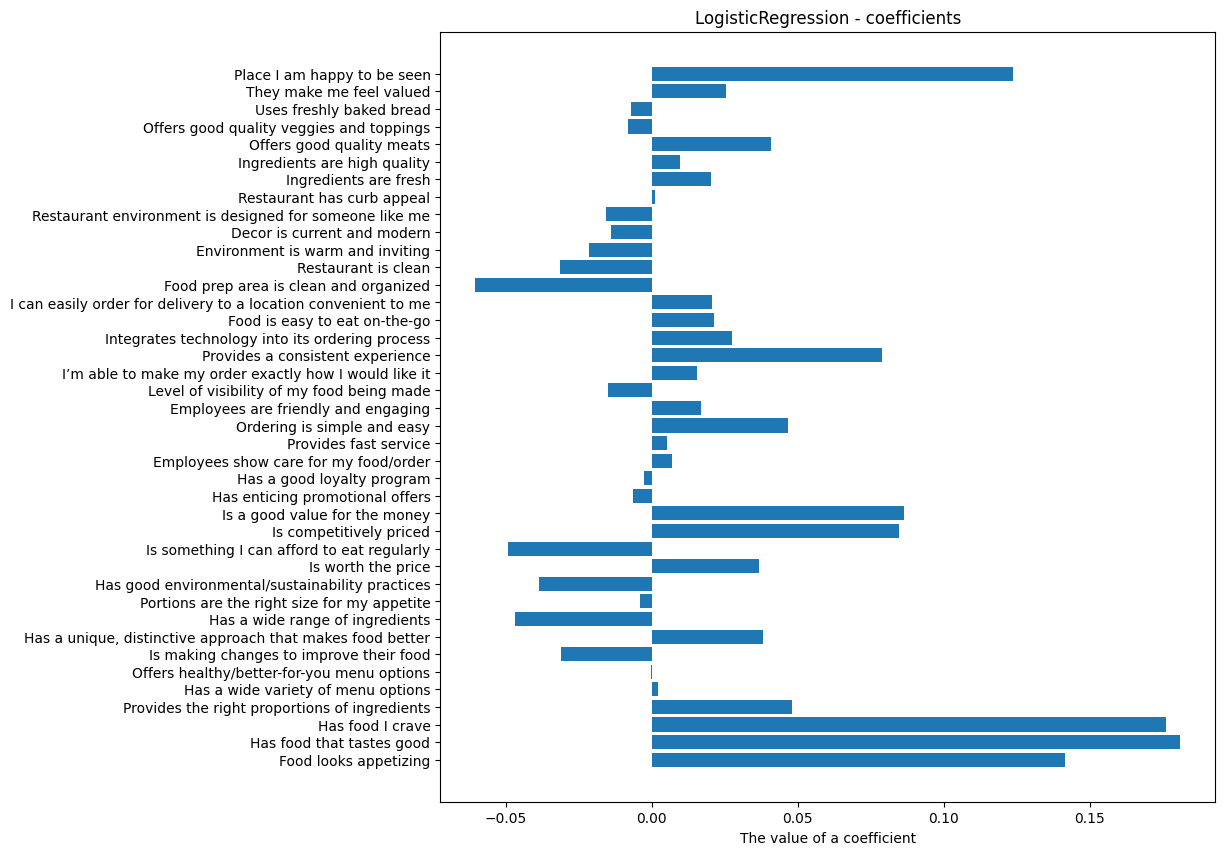

In [23]:
plt.figure(figsize=(10,10))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.xlabel("The value of a coefficient")
plt.title("LogisticRegression - coefficients")
plt.show()